In [1]:
#dependancies
import pandas as pd
import scipy
import matplotlib.pyplot as plt


Visualizing Movie Earnings over 20 years



In [2]:
#import the data from the csv  
file = '../Resources/Movie-data/Attributes_DataFrame.csv'

Movie_atributes = pd.read_csv(file)

Movie_atributes.head(5)


,Title,Domestic,International,Budget,Distributor,MPAA-Rating,Runtime,Genres
0,Jurassic World (2015),652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Action;Adventure;Sci-Fi
1,Star Wars: Episode VII - The Force Awakens (2015),936662225,1131561399,245000000.0,Walt Disney Studios Motion Pictures,PG-13,138,Action;Adventure;Sci-Fi
2,Avengers: Age of Ultron (2015),459005868,943800000,250000000.0,Walt Disney Studios Motion Pictures,PG-13,141,Action;Adventure;Sci-Fi
3,Inside Out (2015),356461711,501149463,175000000.0,Walt Disney Studios Motion Pictures,PG,95,Adventure;Animation;Comedy;Drama;Family;Fantasy
4,Furious 7 (2015),353007020,1162040651,190000000.0,Universal Pictures,PG-13,137,Action;Adventure;Thriller


In [3]:

#get the release year via splitting the title between '(' and ')'
Movie_atributes['Release Year'] = Movie_atributes['Title'].str.split('(').apply(lambda x: x[-1]).str.split(')').apply(lambda x: x[0])


Movie_atributes


,Title,Domestic,International,Budget,Distributor,MPAA-Rating,Runtime,Genres,Release Year
0,Jurassic World (2015),652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Action;Adventure;Sci-Fi,2015
1,Star Wars: Episode VII - The Force Awakens (2015),936662225,1131561399,245000000.0,Walt Disney Studios Motion Pictures,PG-13,138,Action;Adventure;Sci-Fi,2015
2,Avengers: Age of Ultron (2015),459005868,943800000,250000000.0,Walt Disney Studios Motion Pictures,PG-13,141,Action;Adventure;Sci-Fi,2015
3,Inside Out (2015),356461711,501149463,175000000.0,Walt Disney Studios Motion Pictures,PG,95,Adventure;Animation;Comedy;Drama;Family;Fantasy,2015
4,Furious 7 (2015),353007020,1162040651,190000000.0,Universal Pictures,PG-13,137,Action;Adventure;Thriller,2015
...,...,...,...,...,...,...,...,...,...
3395,The Wolf of Snow Hollow (2020),185026,81937,NaN,United Artists Releasing,R,83,Comedy;Horror;Thriller,2020
3396,Come Away (2020),184477,1480982,NaN,Relativity Media,PG,94,Adventure;Drama;Fantasy,2020
3397,No Escape (2020),167962,4135870,NaN,Vertical Entertainment,R,91,Adventure;Horror;Mystery;Thriller,2020
3398,A Call to Spy (2020),159014,681026,NaN,IFC Films,PG-13,123,Biography;Crime;Drama;Thriller;War,2020


In [4]:

year_groups = Movie_atributes.groupby('Release Year')

all_earnings_average = year_groups.mean()[['Domestic','International']]

all_earnings_average =  all_earnings_average.astype(int)
all_earnings_average['Total'] = all_earnings_average.sum(axis=1)
all_earnings_average = all_earnings_average.drop('1999')

([<matplotlib.axis.YTick at 0x2425f60fe88>,
 [Text(0, 20000000, '20'),
  Text(0, 40000000, '40'),
  Text(0, 60000000, '60'),
  Text(0, 80000000, '80'),
  Text(0, 100000000, '100'),
  Text(0, 120000000, '120'),
  Text(0, 140000000, '140'),
  Text(0, 160000000, '160'),
  Text(0, 180000000, '180')])

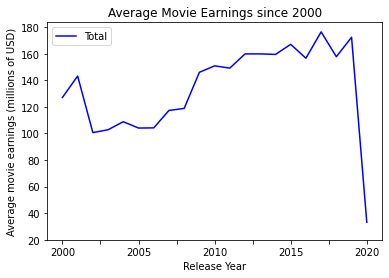

In [5]:
all_earnings_average.reset_index().plot(kind='line',x='Release Year',y='Total',ylabel='Average movie earnings (millions of USD)',title='Average Movie Earnings since 2000',color='blue')
plt.yticks([x*10**7 for x in range(2,20,2)],[x*10**1 for x in range(2,20,2)])


In [6]:
all_earnings_average = all_earnings_average.drop('2020')


([<matplotlib.axis.YTick at 0x2425f6a1188>,
 [Text(0, 80000000, '80'),
  Text(0, 100000000, '100'),
  Text(0, 120000000, '120'),
  Text(0, 140000000, '140'),
  Text(0, 160000000, '160'),
  Text(0, 180000000, '180')])

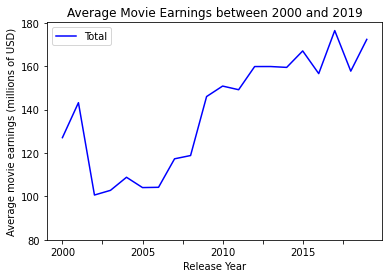

In [7]:
all_earnings_average.reset_index().plot(kind='line',x='Release Year',y='Total',ylabel='Average movie earnings (millions of USD)',title='Average Movie Earnings between 2000 and 2019',color='blue')
plt.yticks([x*10**7 for x in range(8,20,2)],[x*10**1 for x in range(8,20,2)])

Monthly data Visualization


In [8]:
file = '../Resources/Movie-data/Daily_DataFrame.csv'

daily_earnings = pd.read_csv(file)

daily_earnings.head()

,Movie_Title,Date,Daily,Theaters,Rank
0,Jurassic World (2015),2015-06-12,81953950,4274.0,1
1,Jurassic World (2015),2015-06-13,69644830,4274.0,1
2,Jurassic World (2015),2015-06-14,57207490,4274.0,1
3,Jurassic World (2015),2015-06-15,25344820,4274.0,1
4,Jurassic World (2015),2015-06-16,24342515,4274.0,1


In [9]:
daily_earnings= daily_earnings.sort_values(['Movie_Title','Date'])

first_day_earnings = daily_earnings.drop_duplicates('Movie_Title')
first_day_earnings['Release Month'] = first_day_earnings['Date'].str.split('-').apply(lambda x: x[1])
first_day_earnings

C:\Users\zzpie\anaconda3\envs\PythonDataCamp\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Movie_Title,Date,Daily,Theaters,Rank,Release Month
202926,10 Cloverfield Lane (2016),2016-03-11,8981274,3391.0,2,03
100050,"10,000 BC (2008)",2008-03-07,12506898,3410.0,1,03
26626,102 Dalmatians (2000),2000-11-22,2600000,2704.0,3,11
121550,12 Rounds (2009),2009-03-27,1808292,2331.0,6,03
229111,12 Strong (2018),2018-01-19,5672828,3002.0,1,01
...,...,...,...,...,...,...
19978,Zootopia (2016),2016-03-04,19500008,3827.0,1,03
33103,xXx (2002),2002-08-09,17311194,3374.0,1,08
216620,xXx: Return of Xander Cage (2017),2017-01-20,7104191,3651.0,2,01
69753,xXx: State of the Union (2005),2005-04-29,4179324,3480.0,2,04


In [10]:

first_day_earnings = first_day_earnings.rename({'Movie_Title':'Title','Daily':'First Day Earnings'},axis='columns').reset_index()

first_day_earnings


,index,Title,Date,First Day Earnings,Theaters,Rank,Release Month
0,202926,10 Cloverfield Lane (2016),2016-03-11,8981274,3391.0,2,03
1,100050,"10,000 BC (2008)",2008-03-07,12506898,3410.0,1,03
2,26626,102 Dalmatians (2000),2000-11-22,2600000,2704.0,3,11
3,121550,12 Rounds (2009),2009-03-27,1808292,2331.0,6,03
4,229111,12 Strong (2018),2018-01-19,5672828,3002.0,1,01
...,...,...,...,...,...,...,...
3395,19978,Zootopia (2016),2016-03-04,19500008,3827.0,1,03
3396,33103,xXx (2002),2002-08-09,17311194,3374.0,1,08
3397,216620,xXx: Return of Xander Cage (2017),2017-01-20,7104191,3651.0,2,01
3398,69753,xXx: State of the Union (2005),2005-04-29,4179324,3480.0,2,04


In [11]:

extended_attributes = Movie_atributes.sort_values('Title').merge(first_day_earnings,on='Title',how='right')

extended_attributes['Total Earnings'] = extended_attributes['Domestic']+extended_attributes['International']

monthly_group = extended_attributes.groupby('Release Month')

monthly_earnings = monthly_group['Total Earnings','First Day Earnings'].mean().astype(int)
monthly_earnings['Months']= pd.Series(data={'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun','07':'Jul','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'})
monthly_earnings

C:\Users\zzpie\anaconda3\envs\PythonDataCamp\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,Total Earnings,First Day Earnings,Months
Release Month,,,
01,74308425,4219505,Jan
02,101675686,5269452,Feb
03,115836572,6212258,Mar
04,101408665,5439661,Apr
05,238266318,10208895,May
06,209785210,9701944,Jun
07,203189049,9039034,Jul
08,91870837,4599439,Aug
09,71362515,3727505,Sep


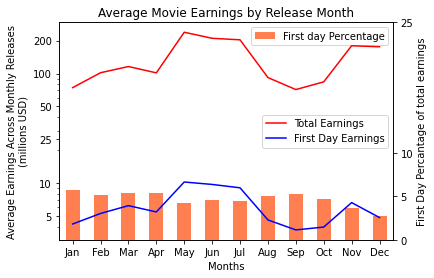

In [16]:
fig, ax = plt.subplots()

ax2= ax.twinx()

vs=[5,10,25,50,100,200]
true_values=[5000000,10000000,25000000,50000000,100000000,200000000]




monthly_earnings['First day Percentage'] = monthly_earnings['First Day Earnings']/monthly_earnings['Total Earnings']*100

percentage_plot = monthly_earnings.plot(kind='bar',x='Months', y= ['First day Percentage'],ax=ax2,ylabel='First Day Percantage of total earnings',color='coral',yticks=[0,5,10,25])


earning_plot =monthly_earnings.plot(kind='line',x='Months', y= ['Total Earnings','First Day Earnings'], ax= ax, ylabel='Average Earnings Across Monthly Releases\n(millions USD)',logy=True, color=['red','blue'],yticks=true_values)

plt.title('Average Movie Earnings by Release Month')
plt.xlabel('Release Month')
ax.set_yticklabels(vs)
earning_plot.patch.set_alpha(0)
earning_plot.set_zorder(3)
percentage_plot.set_zorder(2)
plt.show()